<a href="https://colab.research.google.com/github/Gliitchhh410/PyTorch_Fundmentals/blob/main/01_Workflow_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as t
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(t.randn(1,
                                        dtype = t.float,
                                        requires_grad=True))
    self.bias = nn.Parameter(t.randn(1,
                                     dtype = t.float,
                                     requires_grad=True))

  def forward(self, x: t.Tensor) -> t.Tensor:
    return self.weights * x + self.bias

In [ ]:
t.manual_seed(42)


model_0 = LinearRegressionModel()

print(model_0.state_dict())
list(model_0.parameters())

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = t.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

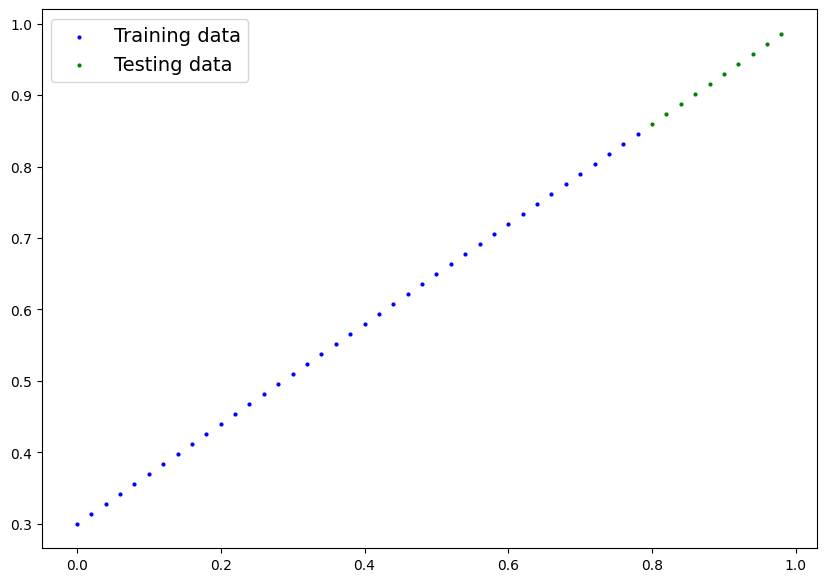

In [ ]:
plot_predictions();


In [ ]:
# Setup a loss function

loss_fn = nn.L1Loss()

#Learning Rate
lr = 0.01
#Setup an optimizer
optimizer = t.optim.SGD(params=model_0.parameters(), lr=lr)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
t.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with t.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(t.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")





Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with t.inference_mode():
  y_pred_new = model_0(X_test)

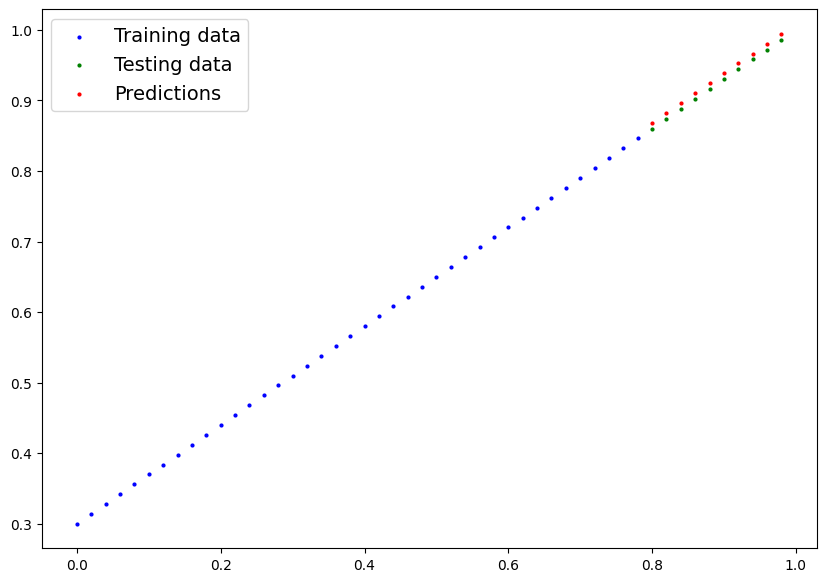

In [ ]:
plot_predictions(predictions =y_pred_new)

Text(0.5, 0, 'No.Epochs')

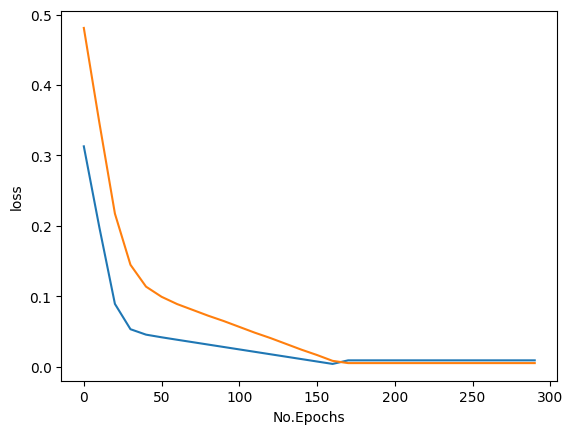

In [ ]:
plt.plot(epoch_count, train_loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Train Loss')
plt.ylabel('loss')
plt.xlabel('No.Epochs')

In [ ]:
#Saving a Model in Pytorch
from pathlib import Path

#Create Models Directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)


#Create Model Save Path
MODEL_NAME='01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#Save the model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
t.save(obj= model_0.state_dict(),
       f=MODEL_SAVE_PATH)

Saving model to:models/01_pytorch_workflow_model_0.pth


In [ ]:
#Loading a Pytorch Model

loaded_model_0  = LinearRegressionModel()

#Loading the save state dict

loaded_model_0.load_state_dict(t.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Trying it

loaded_model_0.eval()
with t.inference_mode():
  loaded_preds = loaded_model_0(X_test)

loaded_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## Putting it all together

In [ ]:
import torch as t
from torch import nn
import matplotlib.pyplot as plt


t.__version__

'2.3.0+cu121'

Create Device Agnostic Code

In [ ]:
device = "cuda" if t.cuda.is_available() else "cpu"

print(f"Operating Device: {device}")

Operating Device: cuda


Create Dummy Data

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02


X = t.arange(start , end, step).unsqueeze(dim = 1) # without unsqueeze errors happens
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Split data

In [ ]:
train_split = int(0.8*len(X))

X_train , y_train = X[:train_split], y[:train_split]

X_test, y_test = X[train_split:],y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Plot Data

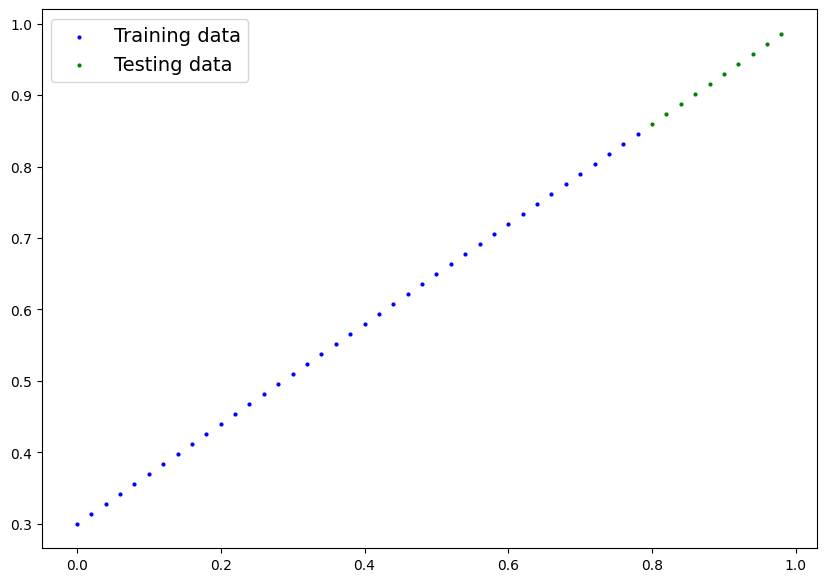

In [ ]:
plot_predictions(X_train, y_train, X_test,y_test)

Creating the Model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__():
    self.weights = t.Parameter(
        t.randn(1,
                dtype = t.float,
                requires_grad = True)
        )
    self.bias = t.Parameter(
        t.randn(
            1,
            dtype = t.float,
            requires_grad = True
        )
    )
  def forward(self, x:t.Tensor) -> t.Tensor:
    return self.weights * x + self.bias



We will try to build a new Model

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1,)

  def forward(self, x: t.Tensor ) -> t.Tensor :
    return self.linear_layer(x)

# Set Manual Seed
t.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Set the Model to the target device

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

# Training the Model

In [ ]:
loss_fn = nn.L1Loss()

optimizer = t.optim.Adam(params = model_1.parameters(),
                         lr = 0.01)


In [ ]:
t.manual_seed(42)

epochs = 500


# Put data on target Device "Device Agnostic Data"

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)

  Loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  Loss.backward()
  optimizer.step()

  model_1.eval()
  with t.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)


    if epoch % 10 == 0 :
      print(f"Epoch: {epoch} || Loss: {Loss} || Test Loss: {test_loss}")

Epoch: 0 || Loss: 0.5551779866218567 || Test Loss: 0.568547248840332
Epoch: 10 || Loss: 0.41617804765701294 || Test Loss: 0.3795474171638489
Epoch: 20 || Loss: 0.27717819809913635 || Test Loss: 0.19054758548736572
Epoch: 30 || Loss: 0.13817833364009857 || Test Loss: 0.012273061089217663
Epoch: 40 || Loss: 0.06483235210180283 || Test Loss: 0.15948258340358734
Epoch: 50 || Loss: 0.06953977793455124 || Test Loss: 0.19462482631206512
Epoch: 60 || Loss: 0.0556403286755085 || Test Loss: 0.14198975265026093
Epoch: 70 || Loss: 0.0445832721889019 || Test Loss: 0.0821138396859169
Epoch: 80 || Loss: 0.03573416545987129 || Test Loss: 0.06503849476575851
Epoch: 90 || Loss: 0.025599658489227295 || Test Loss: 0.05930417403578758
Epoch: 100 || Loss: 0.01504121720790863 || Test Loss: 0.029013914987444878
Epoch: 110 || Loss: 0.0042837196961045265 || Test Loss: 0.0085464958101511
Epoch: 120 || Loss: 0.0037691406905651093 || Test Loss: 0.009793102741241455
Epoch: 130 || Loss: 0.00027832164778374135 || Tes

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7009]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3006], device='cuda:0'))])

In [ ]:
model_1.eval()
with t.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8613],
        [0.8753],
        [0.8893],
        [0.9034],
        [0.9174],
        [0.9314],
        [0.9454],
        [0.9594],
        [0.9734],
        [0.9875]], device='cuda:0')

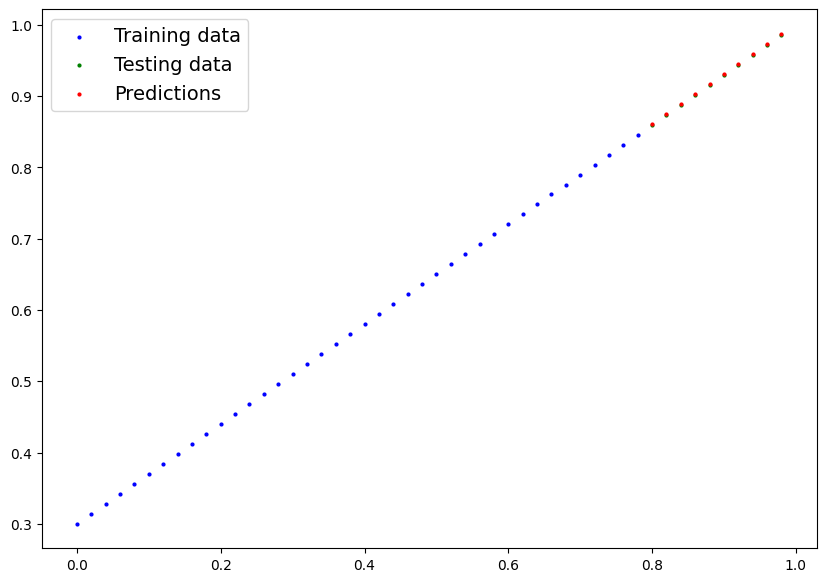

In [ ]:
plot_predictions(predictions = y_preds.cpu())